In [53]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import sklearn
from tensorflow import keras
import cv2
from keras.applications.vgg16 import VGG16

In [34]:
root_dir="C:/Users/Anirudh/OneDrive/Desktop/Dataset"
number_of_images={}
print(os.listdir(root_dir))

['no', 'yes']


In [35]:
for dir in os.listdir(root_dir):
    number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
print(number_of_images.items())

dict_items([('no', 98), ('yes', 155)])


In [4]:
os.mkdir("./train")
for dir in os.listdir(root_dir):
    os.makedirs("./train/"+dir)

In [24]:
def dir(filepath):
    os.mkdir(filepath)
    for dir in os.listdir(root_dir):
        os.makedirs(filepath+dir)

In [25]:
dir("./val/")

In [3]:
X=os.listdir("C:/Users/Anirudh/OneDrive/Desktop/Dataset/yes")

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(
 X, test_size=0.33, random_state=42) 

 



In [38]:
print(X_train)

['Y89.JPG', 'Y165.JPG', 'Y102.jpg', 'Y157.JPG', 'Y75.JPG', 'Y86.JPG', 'Y23.JPG', 'Y114.JPG', 'Y61.jpg', 'Y108.jpg', 'Y51.jpg', 'Y90.jpg', 'Y38.jpg', 'Y1.jpg', 'Y47.JPG', 'Y20.jpg', 'Y168.jpg', 'Y34.jpg', 'Y153.jpg', 'Y164.JPG', 'Y40.JPG', 'Y147.JPG', 'Y14.jpg', 'Y45.JPG', 'Y163.JPG', 'Y96.jpg', 'Y35.jpg', 'Y95.jpg', 'Y77.jpg', 'Y170.JPG', 'Y49.JPG', 'Y194.jpg', 'Y246.JPG', 'Y158.JPG', 'Y92.jpg', 'Y65.JPG', 'Y195.JPG', 'Y41.jpg', 'Y31.jpg', 'Y184.JPG', 'Y103.jpg', 'Y67.JPG', 'Y52.jpg', 'Y180.jpg', 'Y16.JPG', 'Y252.jpg', 'Y25.jpg', 'Y159.JPG', 'Y17.jpg', 'Y105.jpg', 'Y167.JPG', 'Y243.JPG', 'Y50.JPG', 'Y29.jpg', 'Y255.JPG', 'Y8.jpg', 'Y81.jpg', 'Y27.jpg', 'Y106.jpg', 'Y111.JPG', 'Y192.JPG', 'Y73.jpg', 'Y101.jpg', 'Y115.JPG', 'Y162.jpg', 'Y245.jpg', 'Y76.jpg', 'Y104.jpg', 'Y69.jpg', 'Y37.jpg', 'Y100.JPG', 'Y59.JPG', 'Y2.jpg', 'Y53.jpg', 'Y185.jpg', 'Y44.JPG', 'Y181.jpg', 'Y97.JPG', 'Y19.JPG', 'Y18.JPG', 'Y26.jpg', 'Y120.JPG', 'Y188.jpg', 'Y92.png', 'Y7.jpg', 'Y161.JPG', 'Y9.jpg', 'Y10.jpg'

In [5]:
Y=os.listdir("C:/Users/Anirudh/OneDrive/Desktop/Dataset/no")
from sklearn.model_selection import train_test_split
Y_train, Y_test = train_test_split(
 Y, test_size=0.33, random_state=42)

In [6]:
print(Y_train)

['No13.jpg', '14 no.jpg', '6 no.jpg', 'no 5.jpeg', '42 no.jpg', '25 no.jpg', 'no 8.jpg', '41 no.jpg', '17 no.jpg', 'N2.JPG', '35 no.jpg', '28 no.jpg', 'no 94.jpg', '33 no.jpg', 'N17.jpg', '22 no.jpg', '32 no.jpg', '12 no.jpg', '26 no.jpg', '45 no.jpg', '18 no.jpg', 'no 91.jpeg', '15 no.jpg', 'no 923.jpg', '43 no.jpg', 'no.jpg', 'N20.JPG', 'No22.jpg', 'N19.JPG', '5 no.jpg', 'N11.jpg', 'no 2.jpg', '7 no.jpg', 'no 3.jpg', 'N5.jpg', 'No20.jpg', 'no 92.jpg', '48 no.jpeg', 'N22.JPG', '9 no.jpg', 'no 99.jpg', 'N21.jpg', '4 no.jpg', 'No21.jpg', 'N26.JPG', 'no 1.jpg', 'No16.jpg', '44no.jpg', '37 no.jpg', '10 no.jpg', 'N16.jpg', '3 no.jpg', '11 no.jpg', '31 no.jpg', 'No12.jpg', 'No14.jpg', 'no 9.png', 'No11.jpg', 'no 97.jpg', '29 no.jpg', 'N3.jpg', 'no 7.jpeg', '23 no.jpg', 'No17.jpg', 'N15.jpg']


In [42]:
root_yes="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/train/yes"
for k in X_train:
    cv2.imwrite(os.path.join(root_yes,k),cv2.imread(os.path.join("C:/Users/Anirudh/OneDrive/Desktop/Dataset/yes",k)))
    

In [28]:
root_yes="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/val/yes"
for k in X_test:
    cv2.imwrite(os.path.join(root_yes,k),cv2.imread(os.path.join("C:/Users/Anirudh/OneDrive/Desktop/Dataset/yes",k)))

In [43]:
root_no="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/train/no"
for i in Y_train:
    cv2.imwrite(os.path.join(root_no,i),cv2.imread(os.path.join("C:/Users/Anirudh/OneDrive/Desktop/Dataset/no",i)))

In [31]:
root_no="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/val/no"
for i in Y_test:
    cv2.imwrite(os.path.join(root_no,i),cv2.imread(os.path.join("C:/Users/Anirudh/OneDrive/Desktop/Dataset/no",i)))

In [7]:
from keras.layers import Conv2D , MaxPooling2D, Dropout,Flatten,Dense
from keras.models import Sequential
import keras


In [37]:
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu',input_shape=(228,228,3)))
model.add(Conv2D(filters=36, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))




model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 226, 226, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 36)      5220      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 36)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 110, 64)      20800     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 53, 53, 128)      

In [10]:
#vgg
input_shape = [224,224]
vgg = VGG16(input_shape = input_shape + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dense(2, activation = 'softmax')(x)
model = keras.Model(inputs=vgg.input, outputs=x)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [11]:
#vgg
input_shape = [224,224]
vgg = VGG16(input_shape = input_shape + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs=vgg.input, outputs=x)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [12]:
from keras_preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [14]:
def preprocessing(path):
    img_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
    image=img_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
    return image
    

In [15]:
path="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/train"
val_path="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/val"
train_data=preprocessing(path)
validation_data=preprocessing(val_path)


Found 168 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [8]:
print(train_data.class_indices)

{'no': 0, 'yes': 1}


In [16]:
history=model.fit_generator(
  train_data,
  epochs=10,
  validation_data=validation_data
)

C:\Users\Anirudh\AppData\Local\Temp\ipykernel_38208\697272116.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/10
6/6 [==============================] - 25s 4s/step - loss: 2.0746 - acc: 0.4821 - val_loss: 0.5800 - val_acc: 0.6824
Epoch 2/10
6/6 [==============================] - 23s 4s/step - loss: 0.8857 - acc: 0.6250 - val_loss: 0.5033 - val_acc: 0.7647
Epoch 3/10
6/6 [==============================] - 22s 4s/step - loss: 0.5484 - acc: 0.6667 - val_loss: 0.5381 - val_acc: 0.7176
Epoch 4/10
6/6 [==============================] - 23s 4s/step - loss: 0.4901 - acc: 0.7857 - val_loss: 0.4355 - val_acc: 0.8000
Epoch 5/10
6/6 [==============================] - 23s 4s/step - loss: 0.4817 - acc: 0.7738 - val_loss: 0.4702 - val_acc: 0.7882
Epoch 6/10
6/6 [==============================] - 23s 4s/step - loss: 0.4532 - acc: 0.7976 - val_loss: 0.3905 - val_acc: 0.8471
Epoch 7/10
6/6 [==============================] - 23s 4s/step - loss: 0.3980 - acc: 0.7976 - val_loss: 0.4054 - val_acc: 0.8000
Epoch 8/10
6/6 [==============================] - 23s 4s/step - loss: 0.2863 - acc: 0.8750 - val_loss: 0

In [46]:

model.save_weights("model.h2")
path="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/train/yes/Y243.JPG"
path2="C:/Users/Anirudh/OneDrive/Desktop/Neural Network from Scratch/Scripts/val/no/1 no.jpeg"


The image belongs to [[1.]]th class


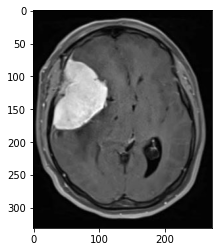

In [55]:
# img=load_img(path)
img=cv2.imread(path)
plt.imshow(img)
img=cv2.resize(img,(224,224))
img=np.reshape(img,(1,224,224,3))
# arr=img_to_array(img)
# print(len(img[0][0][0]))
# x=np.expand_dims(arr,axis=0)
# x=np.reshape(x,(1,255,255,3))
print("The image belongs to "+str(model.predict(img))+"th class")
# model.predict(img)


In [56]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

ImportError: cannot import name 'plot_model' from 'keras.utils' (C:\Python310\lib\site-packages\keras\utils\__init__.py)

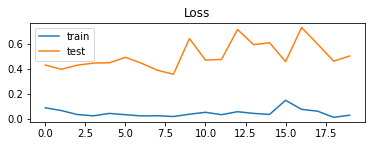

In [ ]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
# plt.subplot(212)
# plt.title('Accuracy')
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='test')
# plt.legend()
# plt.show()

In [ ]:

yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python310\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model_5" (type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None
